In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stocks = pd.read_csv('../sse.csv', header=0)
stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4696.899902,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4289.474609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4320.223145,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4258.726074,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4435.533203,46880000
...,...,...,...,...,...,...,...
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.000000,13221123
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.000000,11000502
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.000000,13889401
5536,2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.000000,10096725


In [3]:
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y-%m-%d')
stocks['Year'] = stocks['Date'].dt.year
stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4696.899902,74195000,2000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4289.474609,74680000,2000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4320.223145,54390000,2000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4258.726074,40305000,2000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4435.533203,46880000,2000
...,...,...,...,...,...,...,...,...
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.000000,13221123,2022
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.000000,11000502,2022
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.000000,13889401,2022
5536,2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.000000,10096725,2022


In [4]:
df = stocks.loc[stocks['Date']>='1990']
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4696.899902,74195000,2000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4289.474609,74680000,2000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4320.223145,54390000,2000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4258.726074,40305000,2000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4435.533203,46880000,2000
...,...,...,...,...,...,...,...,...
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.000000,13221123,2022
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.000000,11000502,2022
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.000000,13889401,2022
5536,2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.000000,10096725,2022


Text(0, 0.5, 'volume')

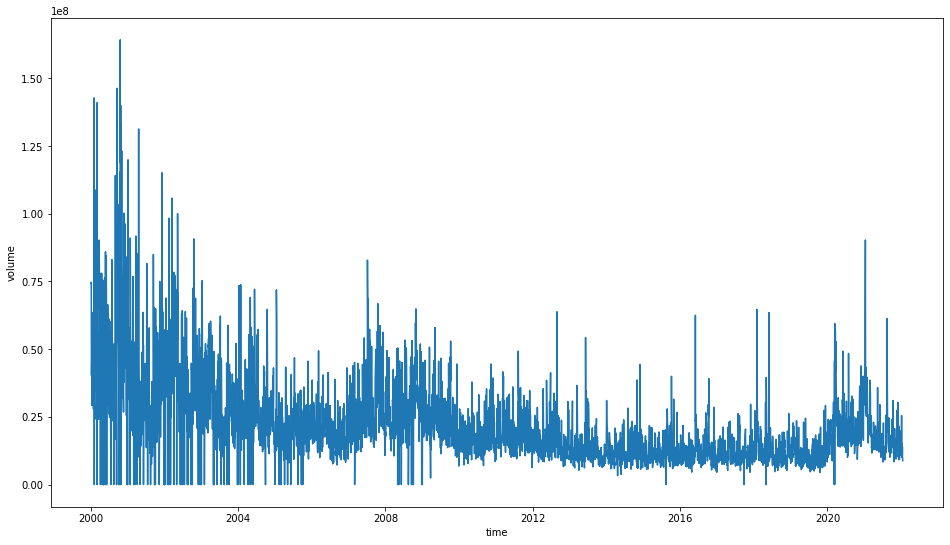

In [5]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Volume'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('volume')

Text(0, 0.5, 'price')

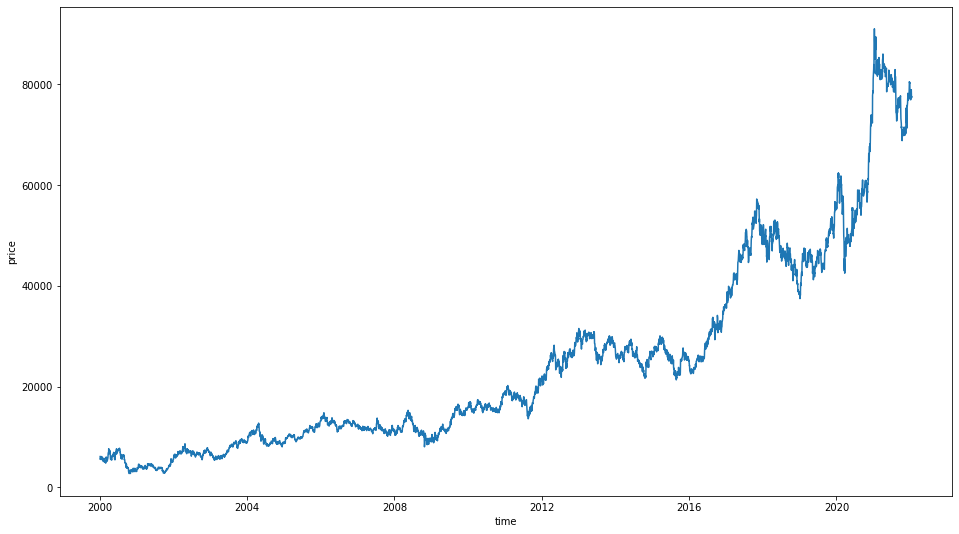

In [6]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Close'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [7]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled

,Open,High,Low,Close,Volume
0,0.039426,0.035623,0.037207,0.038292,0.451816
1,0.037147,0.035091,0.035599,0.032287,0.454770
2,0.036577,0.032114,0.036288,0.032740,0.331212
3,0.034412,0.030944,0.033762,0.031834,0.245440
4,0.034868,0.032008,0.036288,0.034440,0.285479
...,...,...,...,...,...
5533,0.864403,0.810719,0.867938,0.862921,0.080511
5534,0.876937,0.817099,0.874828,0.862921,0.066988
5535,0.874658,0.813909,0.866789,0.851592,0.084581
5536,0.856427,0.801148,0.857602,0.844794,0.061485


In [8]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [9]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    
    # 각 feature당 window_size(20) 만큼 씩의 리스트들을 만든다 ?? 말로 하기 좀... 그건 확실히 이해 못했다는 얘긴데...??
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
        
    return np.array(feature_list), np.array(label_list)

In [10]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 90)


In [11]:
train_feature


array([[[0.03942571, 0.03562314, 0.03720717, 0.45181622],
        [0.03714676, 0.03509145, 0.03559945, 0.45476966],
        [0.03657703, 0.03211399, 0.03628847, 0.33121213],
        ...,
        [0.04193254, 0.03828158, 0.04271934, 0.15893798],
        [0.04147675, 0.0363675 , 0.04317869, 0.        ],
        [0.04398359, 0.04189707, 0.04455673, 0.3208903 ]],

       [[0.03714676, 0.03509145, 0.03559945, 0.45476966],
        [0.03657703, 0.03211399, 0.03628847, 0.33121213],
        [0.03441203, 0.03094428, 0.03376206, 0.24544043],
        ...,
        [0.04147675, 0.0363675 , 0.04317869, 0.        ],
        [0.04398359, 0.04189707, 0.04455673, 0.3208903 ],
        [0.04580675, 0.04040834, 0.04754249, 0.        ]],

       [[0.03657703, 0.03211399, 0.03628847, 0.33121213],
        [0.03441203, 0.03094428, 0.03376206, 0.24544043],
        [0.03486782, 0.03200766, 0.03628847, 0.2854794 ],
        ...,
        [0.04398359, 0.04189707, 0.04455673, 0.3208903 ],
        [0.04580675, 0.040408

In [12]:
train_feature.shape, train_label.shape


((5248, 90, 4), (5248, 1))

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((4198, 90, 4), (1050, 90, 4))

In [14]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape


((200, 4), (200, 1))

In [15]:
test_feature, test_label = make_dataset(test_feature, test_label, 90)
test_feature.shape, test_label.shape

((110, 90, 4), (110, 1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False))
model.add(Dense(1))


In [17]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, epochs=200,
                   batch_size=64,
                   validation_data=(x_valid, y_valid),
                   callbacks=[early_stop, checkpoint])


Epoch 1/200
66/66 [==============================] - 15s 20ms/step - loss: 0.0697 - val_loss: 3.0181e-04

Epoch 00001: val_loss improved from inf to 0.00030, saving model to model\tmp_checkpoint.h5
Epoch 2/200
66/66 [==============================] - 1s 12ms/step - loss: 2.5799e-04 - val_loss: 1.1548e-04

Epoch 00002: val_loss improved from 0.00030 to 0.00012, saving model to model\tmp_checkpoint.h5
Epoch 3/200
66/66 [==============================] - 1s 12ms/step - loss: 1.2756e-04 - val_loss: 1.0868e-04

Epoch 00003: val_loss improved from 0.00012 to 0.00011, saving model to model\tmp_checkpoint.h5
Epoch 4/200
66/66 [==============================] - 1s 12ms/step - loss: 1.0706e-04 - val_loss: 1.0142e-04

Epoch 00004: val_loss improved from 0.00011 to 0.00010, saving model to model\tmp_checkpoint.h5
Epoch 5/200
66/66 [==============================] - 1s 12ms/step - loss: 1.0472e-04 - val_loss: 9.7472e-05

Epoch 00005: val_loss improved from 0.00010 to 0.00010, saving model to model\

66/66 [==============================] - 1s 12ms/step - loss: 5.6356e-05 - val_loss: 6.6454e-05

Epoch 00045: val_loss did not improve from 0.00005


In [18]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(110, 1)

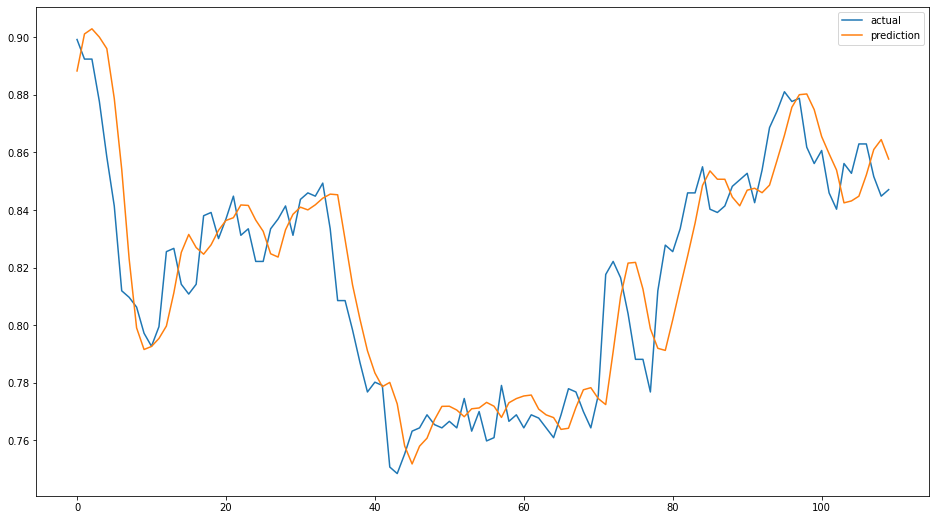

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()